In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Importing Train Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving submission.csv to submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


# Exploratory Data Analysis

In [ ]:
df.shape

(7443, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7443 entries, 0 to 7442
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       7443 non-null   int64  
 1   date         7443 non-null   object 
 2   league_id    7443 non-null   int64  
 3   league       7443 non-null   object 
 4   Team 1       7443 non-null   object 
 5   Team2        7443 non-null   object 
 6   SPI1         7443 non-null   float64
 7   SPI2         7443 non-null   float64
 8   proj_score1  7443 non-null   float64
 9   proj_score2  7443 non-null   float64
 10  importance1  2527 non-null   float64
 11  importance2  2527 non-null   float64
 12  score1       2643 non-null   float64
 13  score2       2643 non-null   float64
 14  xg1          1715 non-null   float64
 15  xg2          1715 non-null   float64
 16  nsxg1        1715 non-null   float64
 17  nsxg2        1715 non-null   float64
 18  adj_score1   1715 non-null   float64
 19  adj_sc

In [ ]:
df.isnull().sum()

season            0
date              0
league_id         0
league            0
Team 1            0
Team2             0
SPI1              0
SPI2              0
proj_score1       0
proj_score2       0
importance1    4916
importance2    4916
score1         4800
score2         4800
xg1            5728
xg2            5728
nsxg1          5728
nsxg2          5728
adj_score1     5728
adj_score2     5728
Outcome           0
dtype: int64

In [ ]:
def null_percentage(df):
  nulls = df.isnull().sum()
  for i,name in enumerate(df):
    if nulls[i] > 0:
      print(f"Null percentage of {name} is {nulls[i]/df.shape[0] *100}")


In [ ]:
null_percentage(df)

Null percentage of importance1 is 66.04863630256617
Null percentage of importance2 is 66.04863630256617
Null percentage of score1 is 64.49012494961708
Null percentage of score2 is 64.49012494961708
Null percentage of xg1 is 76.95821577320973
Null percentage of xg2 is 76.95821577320973
Null percentage of nsxg1 is 76.95821577320973
Null percentage of nsxg2 is 76.95821577320973
Null percentage of adj_score1 is 76.95821577320973
Null percentage of adj_score2 is 76.95821577320973


In [ ]:
df1 = df.drop(["importance1","importance2","score1","score2","xg1","xg2","nsxg1","nsxg2","adj_score1","adj_score2"],axis=1)

In [ ]:
df1.head()

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,Outcome
0,2019,01/03/19,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,1.75,0.84,1
1,2019,01/03/19,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,1.22,1.89,0
2,2019,01/03/19,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,2.58,0.62,1
3,2019,01/03/19,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,1.10,1.79,0
4,2019,01/03/19,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,1.57,1.24,1


In [ ]:
df1.nunique()

season            3
date            424
league_id        39
league           39
Team 1          657
Team2           657
SPI1           2516
SPI2           2514
proj_score1     248
proj_score2     242
importance1     701
importance2     700
score1            8
score2            7
Outcome           2
dtype: int64

In [ ]:
df1.season.unique()

array([2019, 2020, 2021])

In [ ]:
final_df = df[["SPI1","SPI2","proj_score1","proj_score2","Outcome"]]

In [ ]:
final_df.head()

,SPI1,SPI2,proj_score1,proj_score2,Outcome
0,48.22,37.83,1.75,0.84,1
1,39.81,60.08,1.22,1.89,0
2,65.59,39.99,2.58,0.62,1
3,32.25,54.82,1.10,1.79,0
4,38.24,40.45,1.57,1.24,1


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7443 entries, 0 to 7442
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SPI1         7443 non-null   float64
 1   SPI2         7443 non-null   float64
 2   proj_score1  7443 non-null   float64
 3   proj_score2  7443 non-null   float64
 4   Outcome      7443 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 290.9 KB


In [ ]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SPI1,7443.0,40.447416,18.367631,4.71,28.01,38.26,52.16,93.99
SPI2,7443.0,40.486339,18.356843,4.72,27.99,38.29,52.38,94.74
proj_score1,7443.0,1.464127,0.368777,0.43,1.22,1.41,1.66,3.54
proj_score2,7443.0,1.204017,0.365576,0.20,0.96,1.15,1.39,3.20
Outcome,7443.0,0.681177,0.466052,0.00,0.00,1.00,1.00,1.00


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
features = ExtraTreesClassifier()

In [ ]:
X = final_df.drop("Outcome",axis=1)
y = final_df.Outcome

In [ ]:

features.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

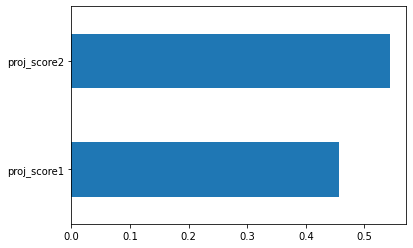

In [ ]:

feature_importance = pd.Series(features.feature_importances_,index=X.columns)
feature_importance.plot(kind='barh')

# Over Sampling

In [ ]:
X = final_df.drop("Outcome",axis=1)
y = final_df.Outcome

In [ ]:
oversample = SMOTE()

In [ ]:
y.value_counts()

1    5070
0    2373
Name: Outcome, dtype: int64

In [ ]:
X,y = oversample.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X.shape,y.shape

((7443, 4), (10140,))

# Outliers

In [ ]:
def plot_outliers(df):
  for i in df:
    ax,fig = plt.subplots(1,figsize=(10,10))
    ax = sns.boxplot(df[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

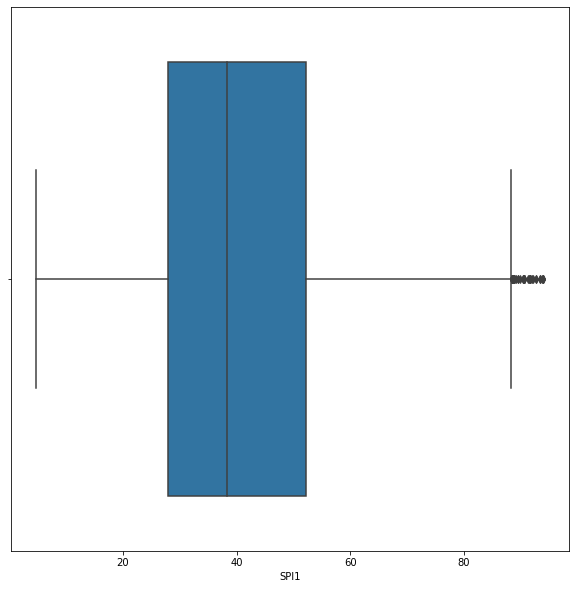

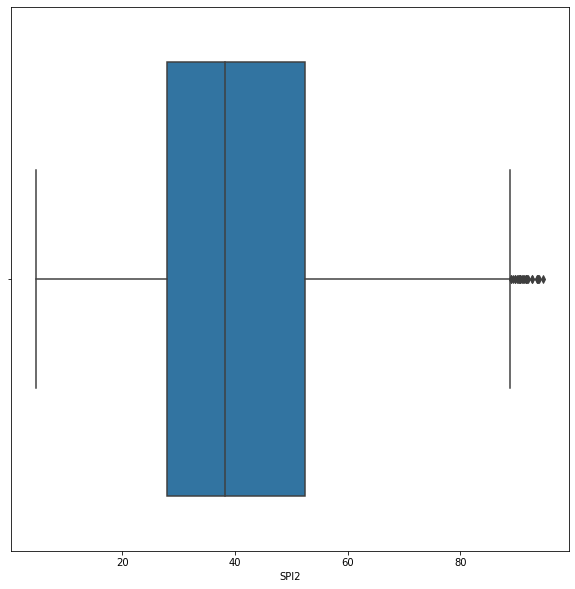

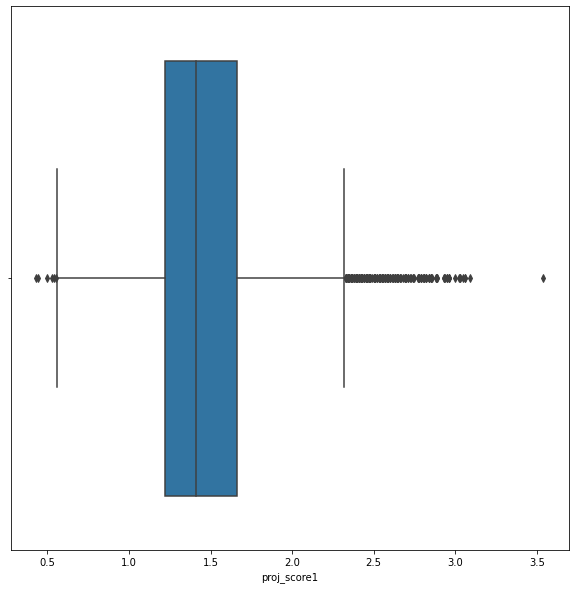

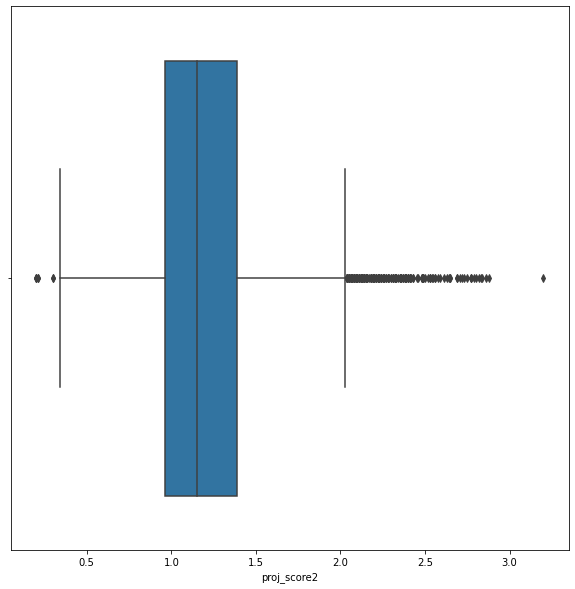

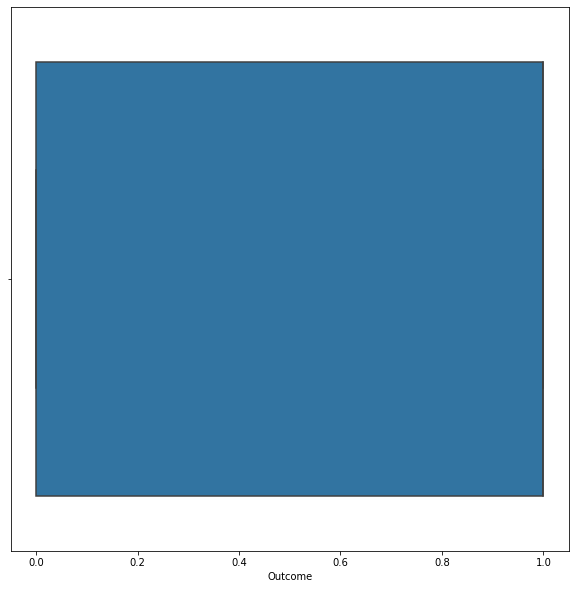

In [ ]:
plot_outliers(final_df)

In [ ]:
X = final_df.drop("Outcome",axis=1)
y = final_df.Outcome

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7443 entries, 0 to 7442
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SPI1         7443 non-null   float64
 1   SPI2         7443 non-null   float64
 2   proj_score1  7443 non-null   float64
 3   proj_score2  7443 non-null   float64
 4   Outcome      7443 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 290.9 KB


In [ ]:
# def capp_outliers(df):
#     for i in df:
#         if df[i].dtypes != 'O':
#             percentile25 = df[i].quantile(0.25)
#             percentile75 = df[i].quantile(0.75)

#             iqr = percentile75 - percentile25

#             upper_limit = percentile75 + 1.5*iqr
#             lower_limit = percentile25 - 1.5*iqr

#             df[i] = np.where(
#             df[i] > upper_limit,upper_limit,
#             np.where(
#             df[i] < lower_limit,lower_limit,
#             df[i]
#             )
#             )
        

#     return df

In [ ]:
# new_X = capp_outliers(X) 

In [ ]:
## No Need of Capping the outliers

# Splitting Data

In [ ]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
scaler = StandardScaler()

In [ ]:
# final_df_trf = scaler.fit_transform(final_df.drop("Outcome",axis=1))
# X_test_trf = scaler.transform(X_test)

In [ ]:
final_df_trf = scaler.fit_transform(X)

In [ ]:
X = final_df_trf


In [ ]:
X

array([[ 0.50147197, -0.26361829,  1.0368447 , -1.19658672],
       [ 0.04016736,  0.89432193, -0.4378421 ,  1.51201291],
       [ 1.45424973, -0.15120701,  3.34625987, -1.76410283],
       ...,
       [ 0.17876835,  0.6151273 ,  0.04587576,  0.84634564],
       [ 1.56694272,  1.9918395 ,  0.37291041,  2.00749231],
       [-0.99110489, -0.71706805, -0.21138628,  0.26049024]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.995069033530572

In [ ]:

pip install catboost

     |████████████████████████████████| 67.4 MB 28 kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cb = CatBoostClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import random
from scipy.stats import randint

In [ ]:
param_dist = { "learning_rate": np.linspace(0,0.2,5),
               "max_depth": randint(3, 10)}

In [ ]:
rscv = RandomizedSearchCV(cb , param_dist, scoring='accuracy', cv =5)

In [ ]:
rscv.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
1:	learn: 0.2776649	total: 5.3ms	remaining: 2.65s
2:	learn: 0.2166026	total: 8.14ms	remaining: 2.71s
3:	learn: 0.1856218	total: 10.9ms	remaining: 2.71s
4:	learn: 0.1541896	total: 13.3ms	remaining: 2.65s
5:	learn: 0.1353102	total: 15.7ms	remaining: 2.6s
6:	learn: 0.1212007	total: 18.4ms	remaining: 2.61s
7:	learn: 0.1113778	total: 21.1ms	remaining: 2.62s
8:	learn: 0.1028455	total: 23.4ms	remaining: 2.58s
9:	learn: 0.0958964	total: 26.1ms	remaining: 2.58s
10:	learn: 0.0918496	total: 28.8ms	remaining: 2.59s
11:	learn: 0.0873918	total: 31.5ms	remaining: 2.59s
12:	learn: 0.0838660	total: 34.1ms	remaining: 2.59s
13:	learn: 0.0811563	total: 36.4ms	remaining: 2.56s
14:	learn: 0.0788902	total: 38.7ms	remaining: 2.54s
15:	learn: 0.0762533	total: 41.1ms	remaining: 2.53s
16:	learn: 0.0738041	total: 43.6ms	remaining: 2.52s
17:	learn: 0.0712798	total: 46.8ms	remaining: 2.55s
18:	learn: 0.0690078	total: 49.8ms	remaining: 2.57s
19:	learn: 0.0661417	tot

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
_catboost.CatBoostError: catboost/private/libs/options/boosting_options.cpp:79: Learning rate should be non-zero

  FitFailedWarning)


Streaming output truncated to the last 5000 lines.
0:	learn: 0.4104505	total: 6.13ms	remaining: 6.12s
1:	learn: 0.2661473	total: 11.8ms	remaining: 5.86s
2:	learn: 0.1887088	total: 17.1ms	remaining: 5.67s
3:	learn: 0.1367032	total: 22.8ms	remaining: 5.67s
4:	learn: 0.1151583	total: 28ms	remaining: 5.58s
5:	learn: 0.0926171	total: 33.5ms	remaining: 5.54s
6:	learn: 0.0810119	total: 39.2ms	remaining: 5.57s
7:	learn: 0.0756973	total: 44.6ms	remaining: 5.53s
8:	learn: 0.0687720	total: 49.7ms	remaining: 5.47s
9:	learn: 0.0642065	total: 55.2ms	remaining: 5.46s
10:	learn: 0.0601186	total: 60.8ms	remaining: 5.47s
11:	learn: 0.0554549	total: 66.2ms	remaining: 5.45s
12:	learn: 0.0529349	total: 71.5ms	remaining: 5.43s
13:	learn: 0.0499918	total: 76.8ms	remaining: 5.41s
14:	learn: 0.0485009	total: 82.1ms	remaining: 5.39s
15:	learn: 0.0468162	total: 87.3ms	remaining: 5.37s
16:	learn: 0.0443558	total: 92.8ms	remaining: 5.36s
17:	learn: 0.0433253	total: 98.4ms	remaining: 5.37s
18:	learn: 0.0412975	tota

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7fa8c2fd0c90>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 ]),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa8c2ff82d0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [ ]:
print(rscv.best_params_)
print(rscv.best_score_)

{'learning_rate': 0.15000000000000002, 'max_depth': 6}
0.9897548137642967


In [ ]:
y_pred_cb = cb.predict(X_test)
accuracy_score(y_test,y_pred_cb)

0.9926124916051041

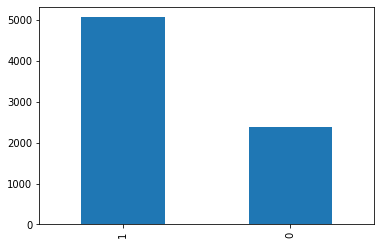

In [ ]:
final_df.Outcome.value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

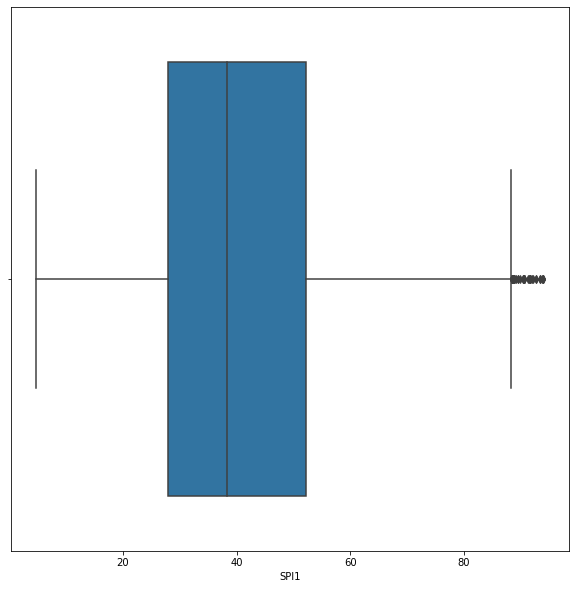

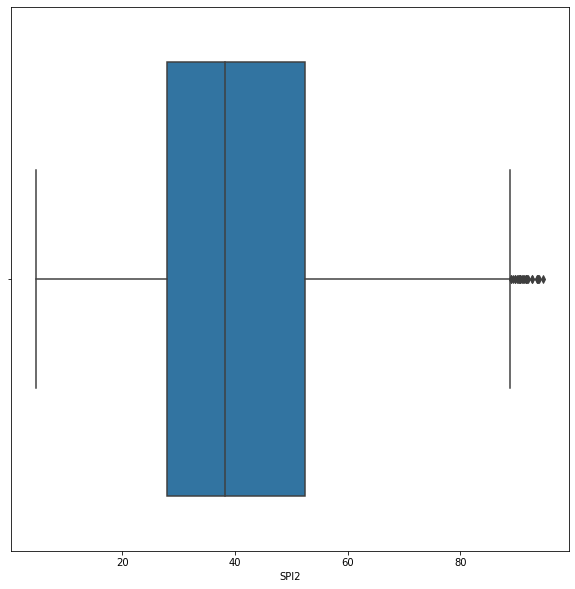

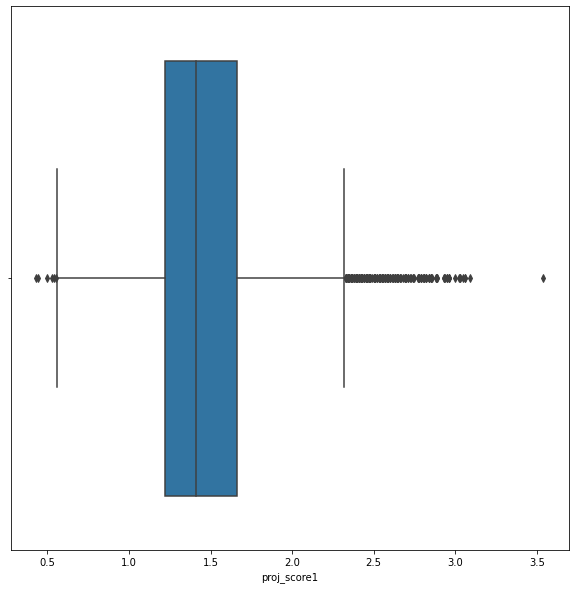

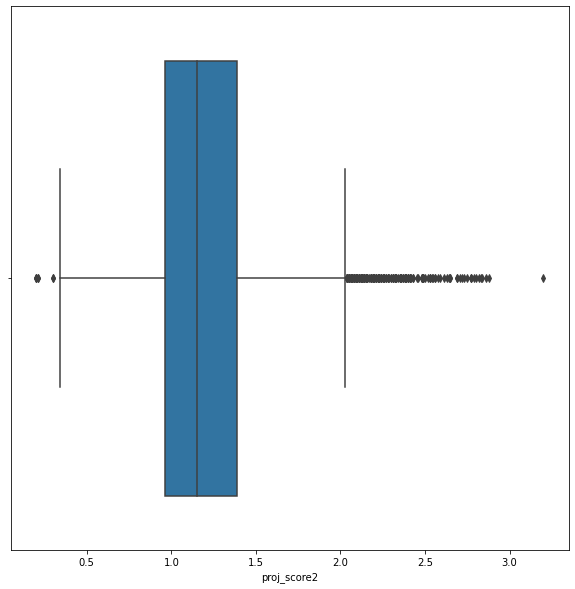

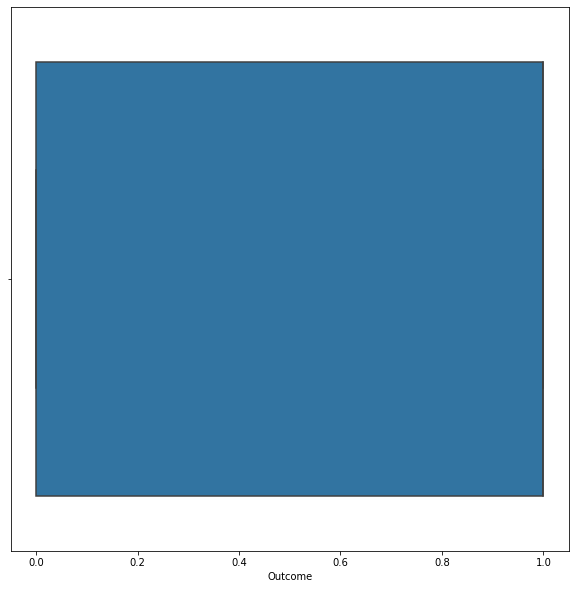

In [ ]:
plot_outliers(final_df)

# Deep Learning

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# model = Sequential()
# model.add(Dense(256,input_dim=X.shape[1],activation='relu'))
# model.add(Dropout(0.4))
# model.add(BatchNormalization())

# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.4))
# model.add(BatchNormalization())

# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.6))
# model.add(BatchNormalization())

# model.add(Dense(32,activation='relu'))
# model.add(BatchNormalization())

# model.add(Dense(16,activation='relu'))
# model.add(BatchNormalization())

# model.add(Dense(8,activation='relu'))
# model.add(BatchNormalization())

# model.add(Dense(1,activation='sigmoid'))

In [ ]:
model = Sequential()
model.add(Dense(300,input_dim=X.shape[1],activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
# model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 300)               1500      
_________________________________________________________________
dense_21 (Dense)             (None, 128)               38528     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
257/257 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9692 - val_loss: 0.0559 - val_accuracy: 0.9726
Epoch 2/10
257/257 [==============================] - 1s 3ms/step - loss: 0.0321 - accuracy: 0.9906 - val_loss: 0.0366 - val_accuracy: 0.9803
Epoch 3/10
257/257 [==============================] - 1s 3ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0211 - val_accuracy: 0.9880
Epoch 4/10
257/257 [==============================] - 1s 3ms/step - loss: 0.0249 - accuracy: 0.9926 - val_loss: 0.0404 - val_accuracy: 0.9825
Epoch 5/10
257/257 [==============================] - 1s 3ms/step - loss: 0.0272 - accuracy: 0.9921 - val_loss: 0.0367 - val_accuracy: 0.9858
Epoch 6/10
257/257 [==============================] - 1s 3ms/step - loss: 0.0242 - accuracy: 0.9925 - val_loss: 0.0180 - val_accuracy: 0.9945
Epoch 7/10
257/257 [==============================] - 1s 3ms/step - loss: 0.0244 - accuracy: 0.9932 - val_loss: 0.0241 - val_accuracy: 0.9912
Epoch 

In [ ]:
score = model.evaluate(X_test,y_test,batch_size=128)

8/8 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9951


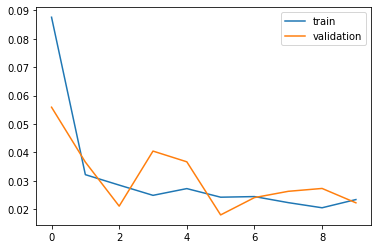

In [ ]:

plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

# Hyperparameter

In [ ]:
pip install keras-tuner

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

# Tuned DL Model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3)

In [ ]:
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Trial 5 Complete [00h 06m 12s]
val_accuracy: 0.5561521251996359

Best val_accuracy So Far: 0.9977628588676453
Total elapsed time: 00h 21m 52s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 11
units_0: 96
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
Score: 0.9977628588676453
Trial summary
Hyperparameters:
num_layers: 13
units_0: 192
units_1: 96
learning_rate: 0.001
units_2: 128
units_3: 160
units_4: 384
units_5: 224
units_6: 256
units_7: 64
units_8: 448
units_9: 256
units_10: 288
units_11: 352
units_12: 64
units_13: 480
units_14: 448
units_15: 96
units_16: 480
units_17: 448
units_18: 448
Score: 0.7704697847366333
Trial summary
Hyperparameters:
num_layers: 18
units_0: 64
units_1: 224
learning_rate: 0.01
units_2: 224
units_3: 64
units_4: 96
units_5: 448
units_6: 96
units_7: 192
units_8: 384
units_9: 384
units_10: 480
units_11: 256
units_12: 416
units_13: 96
units_14: 320
units_15: 352
units_16: 192
units_17: 448
units_18

In [ ]:
models = tuner.get_best_models(num_models=1)[0]

In [ ]:
models.fit(X_train,y_train,batch_size=32,initial_epoch=51,epochs=100,validation_data=(X_test,y_test))

Epoch 52/100
210/210 [==============================] - 2s 6ms/step - loss: 0.0230 - accuracy: 0.9964 - val_loss: 0.0246 - val_accuracy: 0.9960
Epoch 53/100
210/210 [==============================] - 1s 5ms/step - loss: 0.0429 - accuracy: 0.9939 - val_loss: 0.0687 - val_accuracy: 0.9933
Epoch 54/100
210/210 [==============================] - 1s 5ms/step - loss: 0.2050 - accuracy: 0.9789 - val_loss: 0.2060 - val_accuracy: 0.9772
Epoch 55/100
210/210 [==============================] - 1s 5ms/step - loss: 0.0365 - accuracy: 0.9919 - val_loss: 0.0475 - val_accuracy: 0.9960
Epoch 56/100
210/210 [==============================] - 1s 5ms/step - loss: 0.0272 - accuracy: 0.9958 - val_loss: 0.0469 - val_accuracy: 0.9946
Epoch 57/100
210/210 [==============================] - 1s 5ms/step - loss: 0.0258 - accuracy: 0.9960 - val_loss: 0.0460 - val_accuracy: 0.9960
Epoch 58/100
210/210 [==============================] - 1s 5ms/step - loss: 0.0252 - accuracy: 0.9958 - val_loss: 0.0270 - val_accuracy:

In [ ]:
scores = models.evaluate(X_test,y_test,batch_size=32)

24/24 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9973


# Test Data

In [ ]:
test_df = pd.read_csv("/content/test.csv")
test_df.head()

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2021,14/12/21,2411,BPL,Arsenal,West Ham United,79.65,74.06,1.67,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,14/12/21,2411,BPL,Brighton and Hove Albion,Wolverhampton,74.19,71.14,1.35,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,14/12/21,2411,BPL,Norwich City,Aston Villa,60.67,71.45,1.18,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,14/12/21,2411,BPL,Leicester City,Tottenham Hotspur,76.88,79.06,1.52,1.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,14/12/21,2411,BPL,Brentford,Manchester United,63.53,85.58,0.95,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       4008 non-null   int64  
 1   date         4008 non-null   object 
 2   league_id    4008 non-null   int64  
 3   league       4008 non-null   object 
 4   Team 1       4008 non-null   object 
 5   Team2        4008 non-null   object 
 6   SPI1         4008 non-null   float64
 7   SPI2         4008 non-null   float64
 8   proj_score1  4008 non-null   float64
 9   proj_score2  4008 non-null   float64
 10  importance1  0 non-null      float64
 11  importance2  0 non-null      float64
 12  score1       0 non-null      float64
 13  score2       0 non-null      float64
 14  xg1          0 non-null      float64
 15  xg2          0 non-null      float64
 16  nsxg1        0 non-null      float64
 17  nsxg2        0 non-null      float64
 18  adj_score1   0 non-null      float64
 19  adj_sc

In [ ]:
null_percentage(test_df)

Null percentage of importance1 is 100.0
Null percentage of importance2 is 100.0
Null percentage of score1 is 100.0
Null percentage of score2 is 100.0
Null percentage of xg1 is 100.0
Null percentage of xg2 is 100.0
Null percentage of nsxg1 is 100.0
Null percentage of nsxg2 is 100.0
Null percentage of adj_score1 is 100.0
Null percentage of adj_score2 is 100.0


In [ ]:
null_percentage(df)

Null percentage of importance1 is 66.04863630256617
Null percentage of importance2 is 66.04863630256617
Null percentage of score1 is 64.49012494961708
Null percentage of score2 is 64.49012494961708
Null percentage of xg1 is 76.95821577320973
Null percentage of xg2 is 76.95821577320973
Null percentage of nsxg1 is 76.95821577320973
Null percentage of nsxg2 is 76.95821577320973
Null percentage of adj_score1 is 76.95821577320973
Null percentage of adj_score2 is 76.95821577320973


In [ ]:
test_df.season.unique()

array([2021])

In [ ]:
test_df.nunique()

season           1
date           115
league_id       24
league          24
Team 1         426
Team2          426
SPI1           412
SPI2           412
proj_score1    218
proj_score2    215
importance1      0
importance2      0
score1           0
score2           0
xg1              0
xg2              0
nsxg1            0
nsxg2            0
adj_score1       0
adj_score2       0
dtype: int64

In [ ]:
test_df = test_df.drop(["importance1","importance2","score1","score2","xg1","xg2","nsxg1","nsxg2","adj_score1","adj_score2"],axis=1)

In [ ]:
test_df.head()

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2
0,2021,14/12/21,2411,BPL,Arsenal,West Ham United,79.65,74.06,1.67,1.19
1,2021,14/12/21,2411,BPL,Brighton and Hove Albion,Wolverhampton,74.19,71.14,1.35,0.98
2,2021,14/12/21,2411,BPL,Norwich City,Aston Villa,60.67,71.45,1.18,1.49
3,2021,14/12/21,2411,BPL,Leicester City,Tottenham Hotspur,76.88,79.06,1.52,1.44
4,2021,14/12/21,2411,BPL,Brentford,Manchester United,63.53,85.58,0.95,1.92


In [ ]:
test_df1 = test_df[["SPI1","SPI2","proj_score1","proj_score2"]]

In [ ]:
test_df.head()

,SPI1,SPI2,proj_score1,proj_score2
0,79.65,74.06,1.67,1.19
1,74.19,71.14,1.35,0.98
2,60.67,71.45,1.18,1.49
3,76.88,79.06,1.52,1.44
4,63.53,85.58,0.95,1.92


In [ ]:
test_data = scaler.transform(test_df1)

In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Outcome
0,2019,01/03/19,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,1.75,0.84,45.9,22.1,1.0,0.0,1.39,0.26,2.05,0.54,1.05,0.00,1
1,2019,01/03/19,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,1.22,1.89,25.6,63.4,0.0,4.0,0.57,2.76,0.80,1.50,0.00,3.26,0
2,2019,01/03/19,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,2.58,0.62,77.1,28.8,3.0,0.0,0.49,0.45,1.05,0.75,3.15,0.00,1
3,2019,01/03/19,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,1.10,1.79,35.8,58.9,0.0,1.0,1.12,0.97,1.51,0.94,0.00,1.05,0
4,2019,01/03/19,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,1.57,1.24,26.2,21.3,2.0,2.0,2.77,3.17,1.05,2.08,2.10,2.10,1


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization, Embedding, Flatten, LeakyReLU,Activation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# def create_model(layers,activate):
#   model = Sequential()

#   for i,nodes in enumerate(layers):
#     if i == 0:
#       model.add(Dense(nodes,activation=activate[i],input_dim=new_X.shape[0]))
#       model.add(Activation(activation))
#       model.add(Dropout(0.3))
#     else:
#       model.add(Dense(nodes,activation=activate[i]))
#       model.add(Dropout(0.3))
#   model.add(Dense(1,activation='sigmoid'))
#   model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#   return model

In [ ]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model)

In [ ]:
layers = [[20],[30,40,20],[80,50,30,20,10,4],[128,90,64,32,16,8,4]]
activations = ['relu','LeakyReLU','sigmoid','tanh','elu']


In [ ]:
param_grid = dict(layers=layers, activation=activations, batch_size = [32,64,128, 256], epochs=[10,30,50,60,80,100])

In [ ]:

param_grid

{'activation': ['relu', 'LeakyReLU', 'sigmoid', 'tanh', 'elu'],
 'batch_size': [32, 64, 128, 256],
 'epochs': [10, 30, 50, 60, 80, 100],
 'layers': [[20],
  [30, 40, 20],
  [80, 50, 30, 20, 10, 4],
  [128, 90, 64, 32, 16, 8, 4]]}

In [ ]:

grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)

In [ ]:
grid_result = grid.fit(X_train_trf, y_train)

Streaming output truncated to the last 5000 lines.
Epoch 91/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9948
Epoch 92/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9942
Epoch 93/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9940
Epoch 94/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.9923
Epoch 95/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9942
Epoch 96/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9946
Epoch 97/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9950
Epoch 98/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9944
Epoch 99/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9946
Epoch 100/100
10/10 [============================

# Submission

In [ ]:
sub = pd.read_csv("/content/submission.csv")
sub.head()

,Outcome
0,0
1,0
2,0
3,0
4,0


In [ ]:
predictions = model.predict(test_data)

In [ ]:
sub["Outcome"] = predictions

In [ ]:
sub.head()

,Outcome
0,9.991141e-01
1,9.988124e-01
2,3.343121e-05
3,9.901994e-01
4,5.863166e-12


In [ ]:
sub.to_csv("submit17loss0.0145.csv",index=False)